## IMPORTING BASIC LIBRARIES & DATA

In [1]:
# importing basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# importing data
data = pd.read_csv('hotel_cancel.csv')

## ------ NORMAL DISTRIBUTION ------

- Continuous Random Variable
- The basic assumption for Statistical Inference
- Symmetric (mean=median=mode)
- Asymptotic (its tail gets closer & closer to the horizontal axis but it never touches it)
- Standard Normal Distribution has mean=0 & stdev=1
- Z-Scores & Z-Tables are useful for cumulative probability calculation
    - Z = (X-mean) / stdev 
    - X = (Z*stdev) + mean

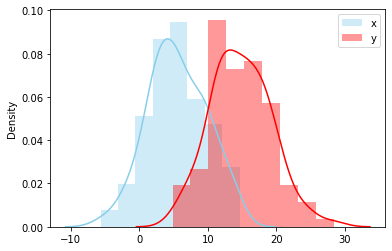

In [47]:
# generating the random variables 
np.random.seed(3)
x = np.random.normal(loc=6, scale=4, size=100)
y = np.random.normal(loc=15, scale=5, size=100)

# plotting the normal distributions
sns.distplot(x, color="skyblue", label="x")
sns.distplot(y, color="red", label="y")
plt.legend()

In [6]:
import scipy.stats as st

# mean(loc):100kg, stdev(scale):10kg
"""what's the probability of getting > 115kg"""
1 - st.norm.cdf(115, loc=100, scale=10)

0.06680720126885809

- 6,68% is the probability of getting > 115 kg 

In [15]:
# mean(loc):100kg, stdev(scale):10kg
"""what's the probability of getting < 80kg"""
st.norm.cdf(80, loc=100, scale=10)

0.022750131948179195

- 2,28% is the probability of getting < 80 kg 

In [16]:
# mean(loc):100kg, stdev(scale):10kg
"""what's the probability of getting between 80kg & 100kg"""
st.norm.cdf(100, loc=100, scale=10) - st.norm.cdf(80, loc=100, scale=10)

0.4772498680518208

- 47,72% is the probability of getting between 80kg & 100kg

In [7]:
# mean(loc):100kg, stdev(scale):10kg
"""what's the probability of getting between 90kg & 110kg"""
norm.cdf(110, loc=100, scale=10) - norm.cdf(90, loc=100, scale=10)

0.6826894921370859

- 68% is the probability of getting between 90kg & 110kg (within 1 stdev)

In [17]:
# mean(loc): 10 bottles, stdev(scale): 2 bottles
"""what's the probability of getting between 6 bottles & 14 bottles"""
norm.cdf(14, loc=10, scale=2) - norm.cdf(6, loc=10, scale=2)

0.9544997361036416

- 95% is the probability of getting orders between 6 bottles & 14 bottles (within 2 stdev)

In [19]:
########## returns probability from a Z-score
st.norm.cdf(1.96)

0.9750021048517795

- Z-Score of 1.96 equals to 97,5% cumulative probability

In [20]:
# returns Z-score from a probability
st.norm.ppf(0.975)

1.959963984540054

- 97,5% cumulative probability equals to Z-Score of 1.959

In [27]:
# writing a function that inputs demand mean, stdev, and probability/proportion
def demand_average(mean, stdev, prob):
    result = (st.norm.ppf(prob)*stdev) + mean
    return result

demand_average(12, 3.2, 0.90)

16.100965009742723

- we should purchase approximately 16 kg of daily stock to meet the daily demand on 90% of the days (given mean 12kg & stdev 3.2kg)

## ------ SAMPLING ------

- Sample:
    - a subset of the population of interest
    - we use sample info to make statistical inference on the population
    - "The credibility of statistical inference depends on the quality of the sample"
- Bias: a tendency of the sample statistic to systematically over/under-estimate population parameter
    - Selection Bias: bias due to exclusion of certain groups from consideration
    - Nonresponse Bias: bias due systematic difference in preference between respondent & nonrespondents on a survey
- Simple Random Sampling: every object has the same prob. to be selected
- Stratified Random Sampling: divide objects into mutually exclusive strata then sample randomly in each stratum
    - (+) greater statistical precision than simple random sampling


In [11]:
# create dataframe
df = pd.DataFrame({'position': ['G', 'G', 'F', 'G', 'F', 'F', 'C', 'C','F', 'C', 'C'],
                   'assists': [5, 7, 7, 8, 5, 7, 6, 9, 7, 6, 9],
                   'rebounds': [11, 8, 10, 6, 6, 9, 6, 10, 9, 6, 10],
                   'team': ['A', 'A', 'A', 'A', 'B', 'B', 'B', 'B','B', 'B', 'B'],})

# view dataframe
df

,position,assists,rebounds,team
0,G,5,11,A
1,G,7,8,A
2,F,7,10,A
3,G,8,6,A
4,F,5,6,B
5,F,7,9,B
6,C,6,6,B
7,C,9,10,B
8,F,7,9,B
9,C,6,6,B


In [10]:
# stratified random sampling (by position)
df.groupby('position', group_keys=False).apply(lambda x: x.sample(2))

,position,assists,rebounds,team
7,C,9,10,B
6,C,6,6,B
2,F,7,10,A
4,F,5,6,B
3,G,8,6,A
1,G,7,8,A


In [12]:
# simple random sampling
df.sample(6)

,position,assists,rebounds,team
7,C,9,10,B
2,F,7,10,A
5,F,7,9,B
0,G,5,11,A
9,C,6,6,B
10,C,9,10,B


In [52]:
# stratified random sampling (by hotel type)
data.groupby('hotel', group_keys=False).apply(lambda x: x.sample(3))

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
90994,City Hotel,0,0,2016,June,25,14,0,1,2,...,No Deposit,NaN,NaN,0,Transient,99.0,0,0,Check-Out,2016-06-15
92027,City Hotel,0,0,2016,June,27,28,0,1,1,...,No Deposit,9.0,NaN,0,Transient,143.0,0,1,Check-Out,2016-06-29
57624,City Hotel,1,447,2016,September,40,29,0,2,2,...,Non Refund,1.0,NaN,0,Transient,62.0,0,0,Canceled,2015-10-21
16137,Resort Hotel,0,65,2015,August,33,9,2,5,1,...,No Deposit,149.0,NaN,0,Transient,107.0,0,0,Check-Out,2015-08-16
23114,Resort Hotel,0,1,2016,April,16,15,0,1,2,...,No Deposit,240.0,NaN,0,Transient,75.0,0,1,Check-Out,2016-04-16
30179,Resort Hotel,0,0,2016,November,47,15,0,1,2,...,No Deposit,306.0,NaN,0,Transient,45.1,0,0,Check-Out,2016-11-16


In [50]:
# simple random sampling
data.sample(6)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
42837,City Hotel,0,168,2015,September,37,11,0,2,1,...,No Deposit,1.0,NaN,0,Transient-Party,50.0,0,0,Check-Out,2015-09-13
14105,Resort Hotel,0,1,2016,January,3,14,0,1,1,...,No Deposit,NaN,144.0,0,Transient-Party,30.0,1,0,Check-Out,2016-01-15
112987,City Hotel,0,0,2017,May,22,29,1,2,2,...,No Deposit,9.0,NaN,0,Transient,153.0,0,2,Check-Out,2017-06-01
47016,City Hotel,1,29,2016,February,6,4,0,1,2,...,No Deposit,9.0,NaN,0,Transient,75.0,0,0,Canceled,2016-01-18
77244,City Hotel,1,6,2015,September,39,20,2,0,2,...,Non Refund,78.0,NaN,0,Transient,100.0,0,0,Canceled,2015-09-15
32788,Resort Hotel,0,15,2017,February,5,3,0,2,2,...,No Deposit,240.0,NaN,0,Transient,88.0,0,1,Check-Out,2017-02-05


## ------ CENTRAL LIMIT THEOREM ------

- Statistical Inference needs the sample distribution to be normal, or approximately normal
- Central Limit Theorem (CLT):
    - it states that approximation to normal distribution steadily improves as the number of observations increase
    - For Sample Mean: n >= 30
    - For Sample Proportion: np >= 5 & n(1-p) >=5

- Z-Score for Sample Mean:  Z = (X - mean)/(stdev/np.sqrt(n_samples))
- Z-Score for Sample Proportion:  Z = (P - proportion)/np.sqrt(p*(1-p)/n_samples)

## ----- ON SAMPLE MEAN ------

In [40]:
# creating function
def prob_sampleMean(X,mean,stdev,n_samples):
    z = (X - mean)/(stdev/np.sqrt(n_samples))
    result = st.norm.cdf(z)
    return result

In [41]:
# mean consumption after ads = $4.26 (sampled from 50 customers)
# given mean consumption before ads $4.18 with stdev $0.84
# question: whats the probability of mean consumption without ads >= $4.26?

1 - prob_sampleMean(4.26, 4.18, 0.84, 50)

0.2503352846480643

- 25% is the probability of customer spending >= $4.26 without ads (which is still plausible)
- Therefore, higher customer spending could be due to chance alone (not significant difference) 

In [42]:
# mean consumption after ads = $5.01 (sampled from 50 customers)
# given mean consumption before ads $4.18 with stdev $0.84
# question: whats the probability of mean consumption without ads >= $5.01?

1 - prob_sampleMean(5.01, 4.18, 0.84, 50)

1.4052092822680606e-12

- 1.4052092822680606e-12 is the probability of customer spending >= $5.01 without ads (which is unlikely)
- Therefore, higher customer spending could be due to ads (significant difference) 

## ----- ON SAMPLE PROPORTION ------

In [46]:
# creating function
def prob_sampleProportion(P,proportion,n_samples):
    z = (P - proportion)/np.sqrt(proportion*(1-proportion)/n_samples)
    result = st.norm.cdf(z)
    return result

In [47]:
# women proportion after ads 46% (sampled from 50 customers)
# given women proportion before ads 43%
# question: whats the probability of women proportion without ads >= 46%?

1 - prob_sampleProportion(0.46, 0.43,50)

0.33414939295303114

- 33.4% is the probability of women proportion >= 46% without ads (which is still plausible)
- Therefore, higher women proportion could be due to chance alone (not significant difference) 

In [48]:
# teenage girls proportion after ads 34% (sampled from 50 customers)
# teenage girls proportion before ads 21%
# question: whats the probability of teenage girls without ads >= 34%?

1 - prob_sampleProportion(0.34, 0.21,50)

0.012008324027426132

- 1.2% is the probability of teenage girls >= 34% without ads (which is unlikely)
- Therefore, higherteenage girls proportion could be due ads (significant difference) 